In [33]:
import numpy as np
import pandas as pd
import utils as utils
from Levenshtein import distance
import matplotlib.pyplot as plt

## 3.5 Seconds coupling time

Full circle sequencing run of 150nt KB synthesis with lower coupling time of 3.5s and no capping. First and last 20nt have normal coupling time to ensure primers are accurate. The sample has been PCR amplified. 

In [23]:
records_1 = utils.get_fastq_records(fastq_filepath=r"C:\Users\Parv\Doc\RA\Projects\sequencing_data\low_coupling_rate\3_5\3_5\3_5.fastq\3_5.fastq")

135319it [00:03, 36131.55it/s]


In [24]:
strands_1 = [str(i.seq) for i in records_1]

In [8]:
from clustering import Clustering

In [10]:
original_strand = "AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT"

In [71]:
little_distance_strands = []

In [72]:
for i in strands_1[:10000]:
    if distance(i, original_strand) < 5:
        little_distance_strands.append(i)

In [73]:
len(little_distance_strands)

122

In [65]:
len(little_distance_strands) / len(strands_1)

0.034703182849415086

In [74]:
t = Clustering(strand_pool=strands_1[:10000], reference_length=150)

In [81]:
t.cluster_strand_pool(distance_threshold=10)

Total strands 10000


100%|██████████| 10000/10000 [01:09<00:00, 143.21it/s]


Number of clusters = 3732
Clusters are sorted
Orientation fixed in the strand pool


[['AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTTA',
  'AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATCAATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTTA',
  'AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCAGGATCATCTGGAACGCTCCGAAAGTCTTGTTA',
  'TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAATAGTCATCCGGAAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT',
  'TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGACATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTTCTGTC',
  'TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGCCAAGACATGGTGGATCCTAACTGGAGCGCCCACCTGGAGATACGATCCGGAGGTGCCAGGATCGTCTCTGGAACGCTCCGAAAGTCTTGTT',
  'AGTGCAACAAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGC

In [88]:
len(t.clustered_seqs[0])

403

In [102]:
from strand_reconstruction import make_prediction, align

distance(make_prediction(t.clustered_seqs[0], sample_size=20), original_strand)

2

In [103]:
len(predicted_strand)

152

In [105]:
predicted_strand = make_prediction(t.clustered_seqs[0], sample_size=15)
print(align(predicted_strand, original_strand))

target            0 TAGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC
                  0 -|||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query             0 -AGTGCAACAAGTCAATCCGTTTCACCAAGGAGGCCTCCTGGAACAATGAATTATGGCGC

target           60 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG
                 60 ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||
query            59 CAAGACATGGTGGATCCTAACTGGAGCGCCGACCTGGAGATACGATCCGGAGGTGCCAGG

target          120 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTTT 152
                120 |||||||||||||||||||||||||||||||- 152
query           119 ATCGTCTCTGGAACGCTCCGAAAGTCTTGTT- 150



In [87]:
for i in t.clustered_seqs[0]:
    print(distance(i, original_strand))

1
3
5
6
5
2
2
2
1
4
1
3
8
1
1
2
8
2
8
1
1
3
3
5
6
8
4
2
1
5
9
2
9
3
1
1
2
4
3
9
3
8
1
3
2
9
2
1
1
3
2
4
1
9
3
3
7
1
2
1
5
2
1
8
9
1
4
9
3
2
11
1
3
3
1
5
3
4
9
2
7
5
1
7
1
2
5
2
8
3
2
1
3
8
5
1
8
1
3
1
4
1
6
1
2
2
2
4
1
2
1
3
1
9
1
2
2
2
5
5
4
4
1
2
5
2
2
6
8
1
1
6
1
10
5
2
6
7
3
3
2
2
1
3
10
11
1
5
2
6
5
8
3
6
1
8
2
8
5
6
2
5
1
6
4
1
2
7
1
6
2
2
9
1
6
2
2
2
3
8
1
3
1
1
9
2
7
8
1
1
3
2
2
3
5
2
1
1
9
5
3
1
1
1
1
11
6
3
8
4
8
10
6
5
3
6
1
1
4
3
5
3
6
5
3
6
2
6
5
5
1
9
2
6
7
1
7
2
1
6
1
11
10
1
6
5
1
7
9
1
3
5
2
8
1
8
1
7
3
2
5
5
3
1
1
1
1
4
5
5
1
1
5
5
1
4
5
5
6
6
1
5
10
4
1
4
6
9
4
1
6
2
10
2
4
4
1
1
6
2
1
4
6
1
1
3
2
9
2
5
2
6
1
1
1
5
8
5
11
6
2
7
5
8
4
5
3
5
4
1
3
6
4
2
6
3
1
1
4
5
6
3
8
8
5
6
7
5
5
2
3
1
6
1
7
7
1
4
4
4
10
2
3
4
2
5
5
4
3
1
5
7
3
6
4
7
1
9
1
3
2
4
2
6
2
3
6
9
4
1
3
7
2
2
2
4
6
5
2
4
1
2
2


In [79]:
for i in t.cluster_heads:
    print(distance(i, original_strand))

1
81
43
104
65
82
80
65
87
82
73
78
61
83
58
58
79
83
60
79
62
60
60
60
64
81
80
84
67
60
83
63
69
62
63
57
82
62
82
69
64
81
61
64
85
80
80
83
83
64
85
63
87
77
62
82
59
63
84
67
63
77
72
59
75
61
64
85
62
63
64
63
80
80
84
84
61
82
80
64
84
82
84
85
64
87
56
68
81
62
77
81
63
80
84
80
64
66
85
64
82
61
65
81
81
84
77
82
83
62
71
59
86
61
66
84
84
68
63
84
61
63
81
62
63
63
65
82
88
65
86
85
60
86
65
80
83
62
81
81
60
82
60
77
58
84
85
80
82
86
64
82
63
63
83
64
83
65
66
81
64
60
61
84
82
80
86
75
60
60
59
83
81
80
80
85
85
62
61
61
63
62
83
84
77
76
55
83
78
60
62
61
61
83
82
55
84
84
84
64
83
59
83
60
62
82
85
83
81
60
86
62
60
59
63
79
63
65
81
84
85
63
78
67
60
79
86
61
54
60
85
64
85
63
81
66
85
84
60
63
78
69
83
56
83
83
83
85
78
86
66
63
83
81
62
70
85
66
81
79
83
63
82
85
67
65
62
65
58
64
63
82
81
63
85
61
61
76
84
82
85
65
81
84
87
83
82
59
83
66
67
64
60
79
65
59
63
59
61
81
63
62
69
60
66
83
64
65
59
59
59
84
85
64
82
62
82
65
79
85
59
64
67
60
64
61
62
85
64
64
63
61
86
6

In [25]:
distance(original_strand[-20:], strands_1[331][-20:])

2

In [26]:
strands_to_be_clustered = [i[20:-20] for i in strands_1]

In [29]:
unique_strand_counter = {}

for i in strands_to_be_clustered:
    if i in unique_strand_counter:
        unique_strand_counter[i] += 1
    else:
        unique_strand_counter[i] = 0

In [31]:
len(unique_strand_counter)

79017

In [32]:
unique_strand_lens = [len(i) for i in unique_strand_counter.keys()]

(array([4.791e+03, 7.241e+04, 8.570e+02, 2.840e+02, 6.000e+02, 5.800e+01,
        1.300e+01, 3.000e+00, 0.000e+00, 1.000e+00]),
 array([ 10. ,  66.7, 123.4, 180.1, 236.8, 293.5, 350.2, 406.9, 463.6,
        520.3, 577. ]),
 <BarContainer object of 10 artists>)

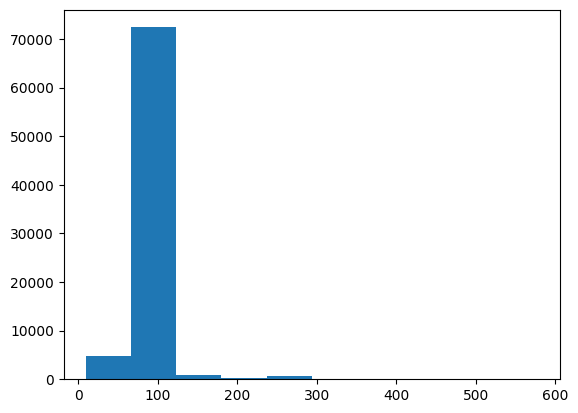

In [34]:
plt.hist(unique_strand_lens)

In [36]:
filtered_strands = [i for i in unique_strand_counter.keys() if len(i) > 70 and len(i) < 110]

(array([2.4645e+04, 2.7000e+02, 1.4500e+02, 1.3000e+02, 5.5000e+01,
        5.9000e+01, 2.1000e+01, 9.0000e+00, 6.0000e+00, 3.0000e+00]),
 array([ 0. ,  2.6,  5.2,  7.8, 10.4, 13. , 15.6, 18.2, 20.8, 23.4, 26. ]),
 <BarContainer object of 10 artists>)

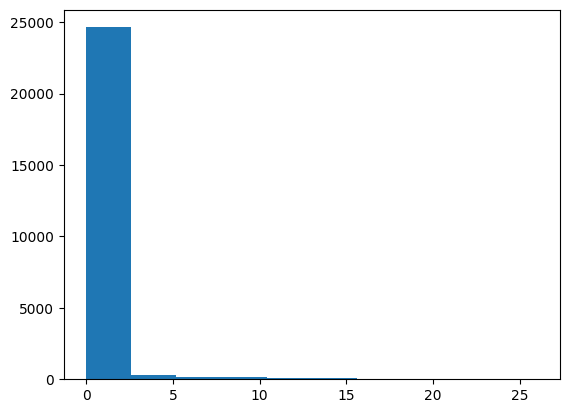

In [38]:
plt.hist([unique_strand_counter[i] for i in filtered_strands])

In [40]:
# Quantifying number of deletions over the profiles
deletions = [110 - len(i) for i in filtered_strands]

Text(0, 0.5, 'Number of deletion profiles')

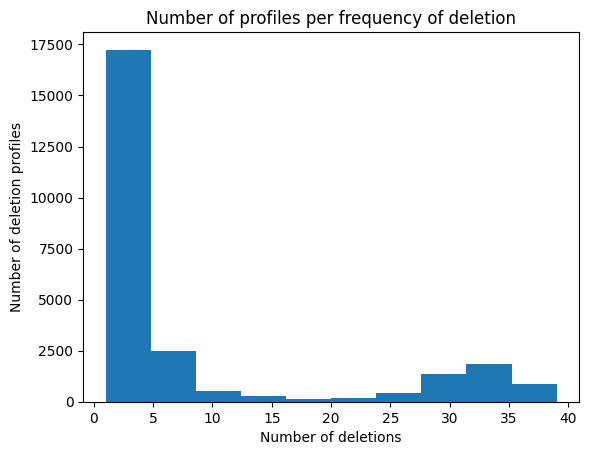

In [43]:
plt.hist(deletions)
plt.title("Number of profiles per frequency of deletion")
plt.xlabel("Number of deletions")
plt.ylabel("Number of deletion profiles")

In [47]:
len(original_strand[20:-20])

110

In [50]:
for i in filtered_strands:
    if len(i) > 100:
        print(distance(i, original_strand[20:-20]))
        print(distance(utils.reverse_complement(i), original_strand[20: -20]))
        print()

59
64

58
57

59
59

61
57

61
61

61
56

56
62

62
63

5
57

56
58

57
59

62
56

64
59

61
58

63
57

57
66

54
61

61
57

58
61

64
60

59
63

61
54

62
59

58
55

56
65

65
61

56
58

56
58

58
58

57
63

61
62

65
59

58
61

62
61

62
63

62
59

60
61

56
60

59
60

62
56

61
58

60
62

65
63

60
53

65
61

59
59

58
57

58
1

60
63

62
57

53
59

56
59

57
4

63
58

64
60

63
57

56
10

65
60

61
61

58
57

58
59

61
63

58
65

60
60

59
57

61
60

58
61

66
66

62
61

63
63

4
55

58
62

7
59

57
59

60
57

60
63

61
60

63
61

63
57

60
62

61
63

59
61

60
3

60
59

56
56

63
62

3
56

63
59

61
58

59
58

58
3

58
8

60
60

61
62

61
61

62
59

64
63

64
61

59
59

62
58

56
60

57
12

60
62

63
61

65
60

61
60

60
61

62
63

61
60

56
62

59
57

64
62

57
60

58
60

63
55

59
52

54
48

63
59

62
9

59
60

61
56

63
57

54
58

60
61

60
58

64
62

59
61

59
58

62
58

58
62

59
62

56
62

60
58

53
56

57
3

59
64

56
58

66
61

59
63

57
62

59
58

60
57

62
60

64
59

60


In [20]:
len(strands[21])

151

## 4.5 seconds coupling time

Same strand, 4.5 seconds coupling time